In [1]:
import torch
import requests
import os
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import zipfile
from tqdm.auto import tqdm
from typing import Dict, List, Tuple
device = "cuda"
image_path = Path("more_images/")
train_dir = Path("more_images/train/")
test_dir = Path("more_images/test/")
if image_path.is_dir():
    print(f"{image_path} directory exists.")
train_dir, test_dir
image_path_list = list(image_path.glob("*/*/*.jpeg"))

more_images directory exists.


In [2]:
image_path = Path("images/")
train_dir = Path("more_images/train/")
test_dir = Path("images/test/")
if image_path.is_dir():
    print(f"{image_path} directory exists.")
train_dir, test_dir
image_path_list = list(train_dir.glob("*/*.jpeg"))
len(image_path_list)

images directory exists.


509

In [3]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2, figsize = (5,5))
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

In [ ]:
count = 0
manual_transforms = transforms.Compose([
    transforms.Resize((80, 80), antialias=True),
    transforms.ColorJitter(brightness=0.2, contrast=0.25, saturation=0.250, hue=0.0),
    transforms.ToTensor(),
])

def plot_transformed_images_batch(image_path, transform, output_folder, n=100, seed=42):
    global count
    np.random.seed(seed)
    with Image.open(image_path) as f:
        original_image = f.copy()

        # Create the output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)

        for i in range(1, n+1):
            # Original Image
            # plt.subplot(10, 10, i)
            # plt.imshow(original_image)
            # plt.title(f"Original \nSize: {original_image.size}")
            # plt.axis("off")

            # # Transformed Image
            transformed_image = transform(f).permute(1, 2, 0)
            # plt.subplot(10, 10, i + n if i + n <= n else i + n - n)  # Corrected the subplot index
            # plt.imshow(transformed_image)
            # plt.title(f"Transformed \nSize: {transformed_image.shape}")
            # plt.axis("off")

            # Save Transformed Image
            transformed_image_np = (transformed_image.numpy() * 255).astype(np.uint8)
            transformed_image_pil = Image.fromarray(transformed_image_np)
            image_name = f"transformed_{count}.jpeg"
            image_path = os.path.join(output_folder, image_name)
            transformed_image_pil.save(image_path)
            count += 1

            # Reset to original for the next iteration
            f = original_image.copy()

        plt.tight_layout()
        plt.show()

folder_names = ["Combat", "DestroyedBuildings", "Fire", "Humanitarian Aid and rehabilitation", "Military vehicles and weapons"]
for name in folder_names:
    train_dir = Path(f"more_images/train/{name}")
    image_path_list = list(train_dir.glob("*.jpeg"))
    output_folder = f"more_images/train/{name}"
    for image_path in image_path_list:
        plot_transformed_images_batch(image_path, manual_transforms, output_folder)

In [6]:
folder_names = ["Combat", "DestroyedBuildings", "Fire", "Humanitarian Aid and rehabilitation", "Military vehicles and weapons"]
for name in folder_names:
    train_dir = Path(f"more_images/train/{name}")
    image_path_list = list(train_dir.glob("*.jpeg"))
    output_folder = f"more_images/train/{name}"
    print(len(image_path_list))

10302
10302
10302
10201
10302


In [7]:
image_path = Path("images/")
train_dir = Path("more_images/train/")
test_dir = Path("images/test/")
if image_path.is_dir():
    print(f"{image_path} directory exists.")
train_dir, test_dir
image_path_list = list(train_dir.glob("*/*.jpeg"))
len(image_path_list)

images directory exists.


51409

-------------------------------------------------------------------------------------------

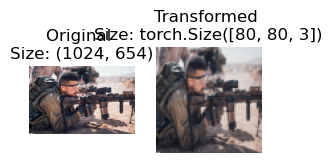

In [8]:
def plot_transformed_images2(image_path, transform, n=3, seed=42):
    with Image.open(image_path) as f:
        fig, ax = plt.subplots(1, 2, figsize = (3,3))
        ax[0].imshow(f) 
        ax[0].set_title(f"Original \nSize: {f.size}")
        ax[0].axis("off")
        transformed_image = transform(f).permute(1, 2, 0) 
        ax[1].imshow(transformed_image) 
        ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
        ax[1].axis("off")
        transformed_image_np = (transformed_image.numpy() * 255).astype('uint8')
        transformed_image_pil = Image.fromarray(transformed_image_np)
        transformed_image_pil.save("Y.jpg")

plot_transformed_images2(r"images/train/Combat/7zOWtwsLHIQBwdg.jpeg", manual_transforms)

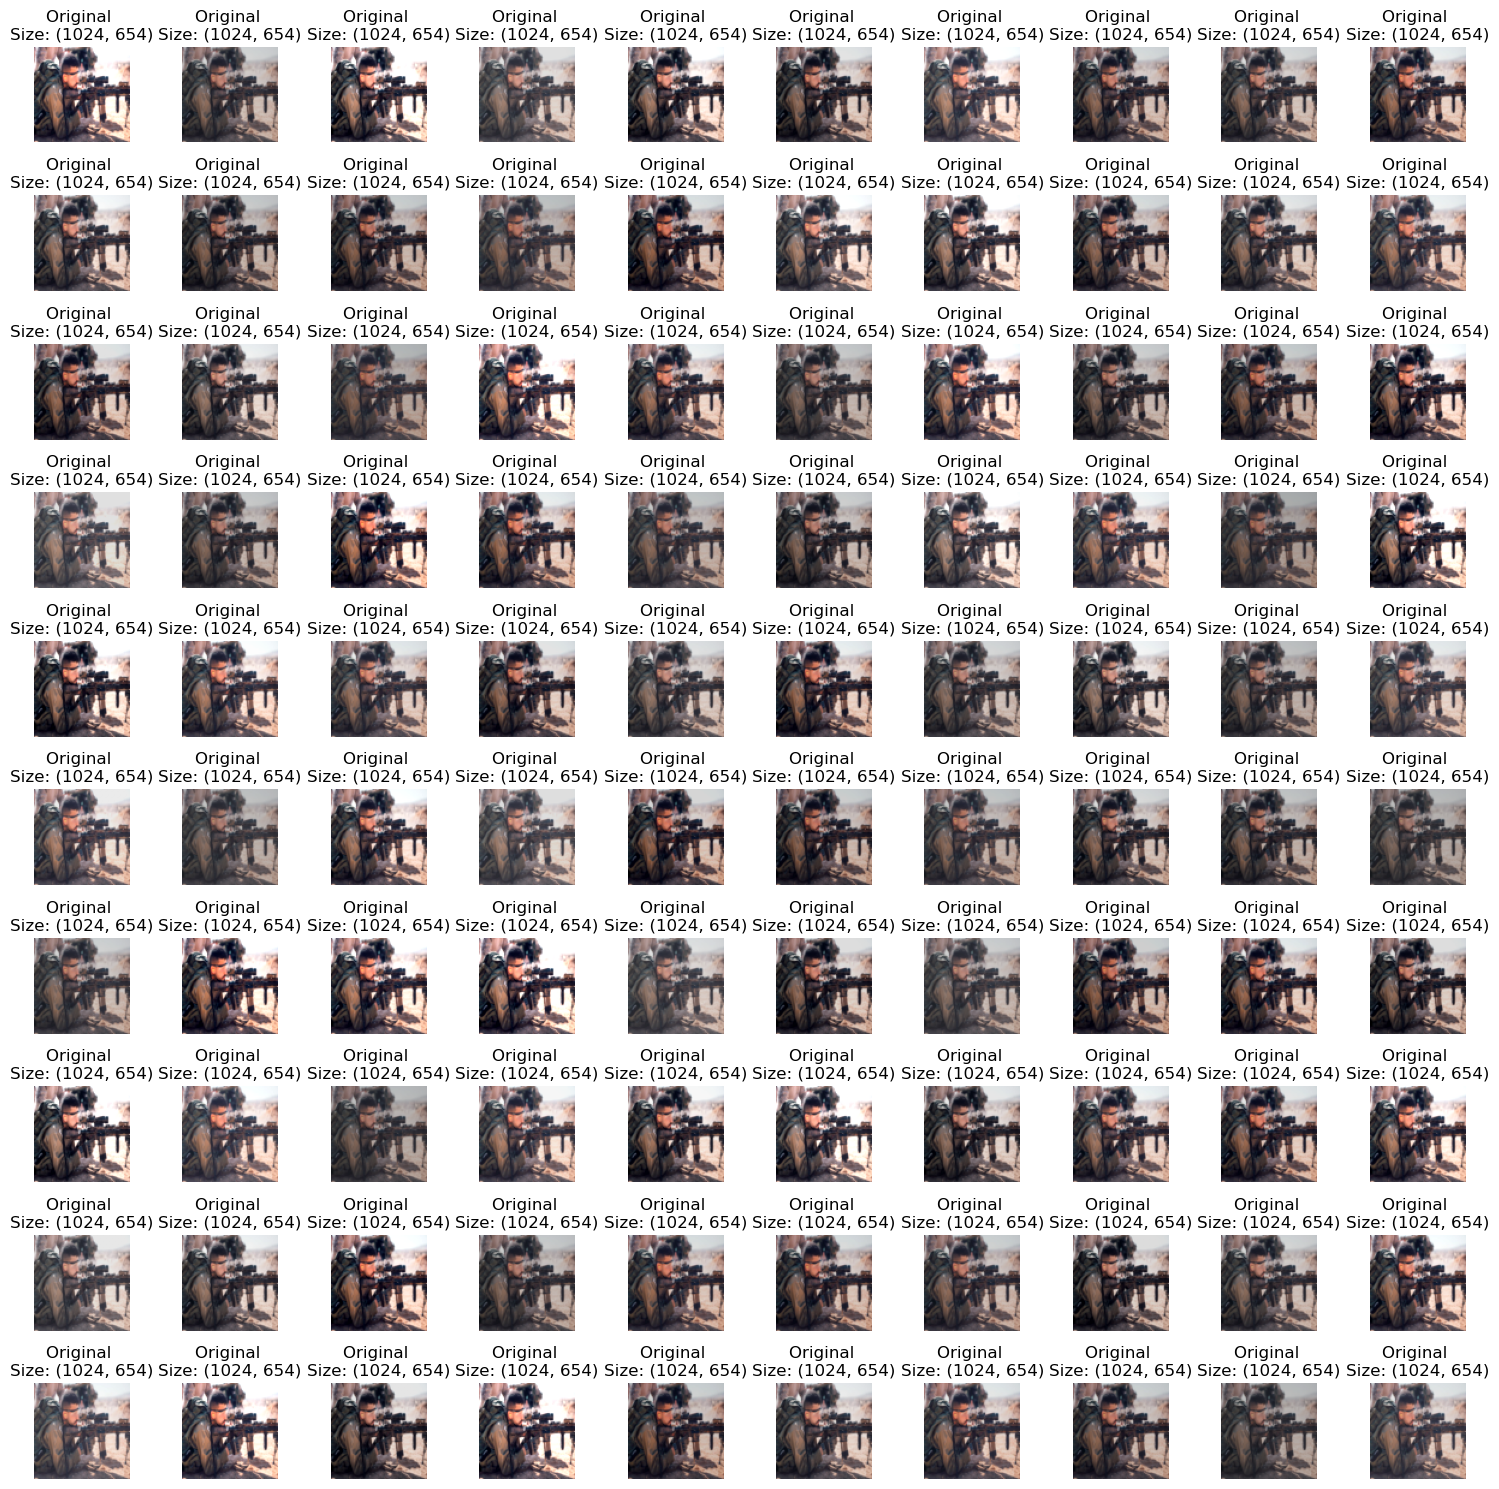

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
import numpy as np

manual_transforms = transforms.Compose([
    transforms.Resize((80, 80), antialias=True),
    transforms.ColorJitter(brightness=0.2, contrast=0.25, saturation=0.250, hue=0.0),
    transforms.ToTensor(),
])

def plot_transformed_images_batch(image_path, transform, n=100, seed=42):
    np.random.seed(seed)
    with Image.open(image_path) as f:
        original_image = f.copy()
        plt.figure(figsize=(15, 15))

        for i in range(1, n+1):
            plt.subplot(10, 10, i)
            plt.imshow(original_image)
            plt.title(f"Original \nSize: {original_image.size}")
            plt.axis("off")

            transformed_image = transform(f).permute(1, 2, 0)
            plt.subplot(10, 10, i + n if i + n <= n else i + n - n)  # Corrected the subplot index
            plt.imshow(transformed_image)
            # plt.title(f"Transformed \nSize: {transformed_image.shape}")
            plt.axis("off")
            f = original_image.copy()  # Reset to original for the next iteration

    plt.tight_layout()
    plt.show()

image_path = r"images/train/Combat/7zOWtwsLHIQBwdg.jpeg"
plot_transformed_images_batch(image_path, manual_transforms)


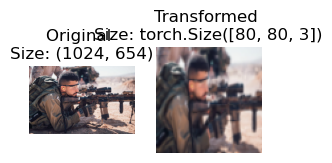

In [30]:
manual_transforms = transforms.Compose([
    transforms.Resize((80, 80), antialias=True),
    transforms.RandomResizedCrop((80, 80), scale=(0.7, 1.0)),
    transforms.ToTensor(),
])

plot_transformed_images2(r"images/train/Combat/7zOWtwsLHIQBwdg.jpeg", manual_transforms)